IE 7300: Statistical learning for Engineering
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<
<h1><center><font size="7">Project</font></center></h1>
<center><font size="3">Yufei Sun</font></center>
<center><font size="3">206-5911-387</font></center>
<center><font size="3">sun.yufe@northeastern.edu</font></center>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

<font size="3">Percentage of Effort Contributed by Student : 100%</font><br>
<font size="3">Signature of Student : Yufei Sun</font><br>
<font size="3">Submission Date: 12/15/2023</font><br>

Import packages

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore") #suppress warnings

Read in the dataset


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving in-vehicle-coupon-recommendation.csv to in-vehicle-coupon-recommendation.csv


In [ ]:
#Read in the dataset
ivcr = pd.read_csv("in-vehicle-coupon-recommendation.csv")
ivcr.info()
ivcr.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [ ]:
#Basic statistics
print(ivcr.info())
print(ivcr.describe())
print(ivcr.corr())
print(ivcr.describe(include=[np.object]))
print(ivcr.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

<ipython-input-5-73638e85cd3b>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(ivcr.corr())
<ipython-input-5-73638e85cd3b>:5: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print(ivcr.describe(include=[np.object]))


destination               0
passanger                 0
weather                   0
temperature               0
time                      0
coupon                    0
expiration                0
gender                    0
age                       0
maritalStatus             0
has_children              0
education                 0
occupation                0
income                    0
Bar                     107
CoffeeHouse             217
CarryAway               151
RestaurantLessThan20    130
Restaurant20To50        189
toCoupon_GEQ5min          0
toCoupon_GEQ15min         0
toCoupon_GEQ25min         0
direction_same            0
direction_opp             0
Y                         0
dtype: int64


<Axes: >

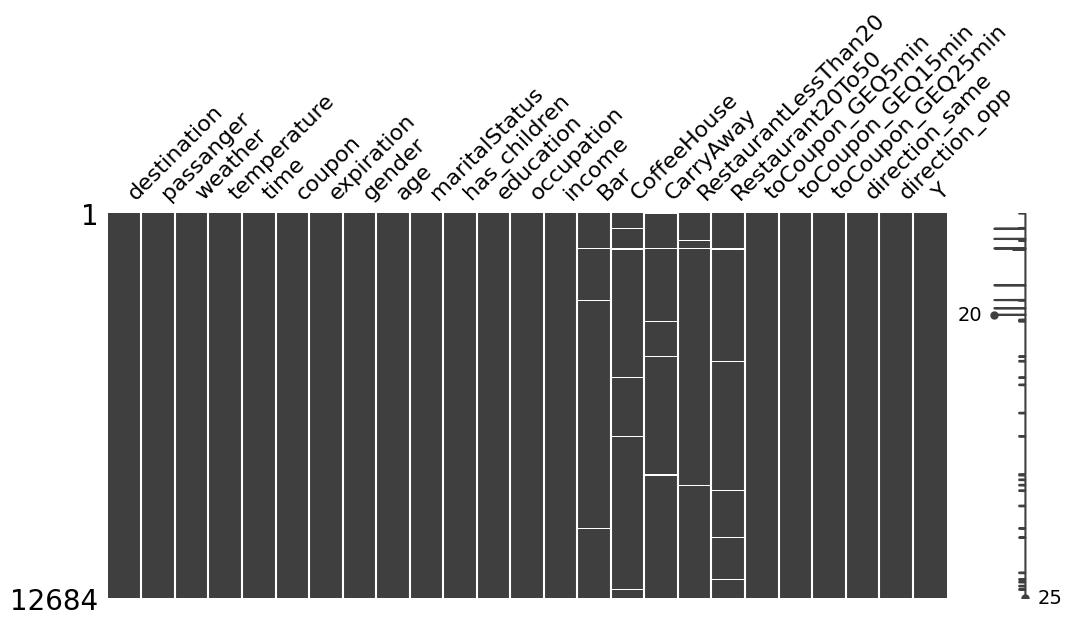

In [ ]:
#Check the missing value
print(ivcr.isnull().sum())
#Visualization showing
msno.matrix(ivcr,figsize=(12,5))

In [ ]:
#Check the current column name
print(ivcr.columns)
#Fill out the missing value with the columns mean or median
#Bar
#Since the in the median falls into the less1 interval, fill the less1 into missing values
print(ivcr.Bar.value_counts())
ivcr.fillna({"Bar":"less1"}, inplace = True)
#CoffeeHouse
#Since the in the median falls into the less1 interval, fill the less1 into missing values
print(ivcr.CoffeeHouse.value_counts())
ivcr.fillna({"CoffeeHouse":"less1"}, inplace = True)
#CarryAway
#Since the in the median falls into the less1 interval, fill the less1 into missing values
print(ivcr.CarryAway.value_counts())
ivcr.fillna({"CarryAway":"less1"}, inplace = True)
#RestaurantLessThan20
#Since the in the median falls into the 1~3 interval, fill the less1 into missing values
print(ivcr.RestaurantLessThan20.value_counts())
ivcr.fillna({"RestaurantLessThan20":"1~3"}, inplace = True)
#Restaurant20To50
#Since the in the median falls into the less1 interval, fill the less1 into missing values
print(ivcr.Restaurant20To50.value_counts())
ivcr.fillna({"Restaurant20To50":"less1"}, inplace = True)
#After doing this, have cleaned up the dataset, there is no missing value
print(ivcr.isnull().sum())

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y'],
      dtype='object')
never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: Bar, dtype: int64
less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
Name: CoffeeHouse, dtype: int64
1~3      4672
4~8      4258
less1    1856
gt8      1594
never     153
Name: CarryAway, dtype: int64
1~3      5376
4~8      3580
less1    2093
gt8      1285
never     220
Name: RestaurantLessThan20, dtype: int64
less1    6077
1~3      3290
never    2136
4~8       728
gt8       264
Name: Restaurant20To50, dtype: int64
destination             0
passanger               0
weather        

In [ ]:
ivcr.rename(columns={'Y': 'UsedorNot'}, inplace=True)

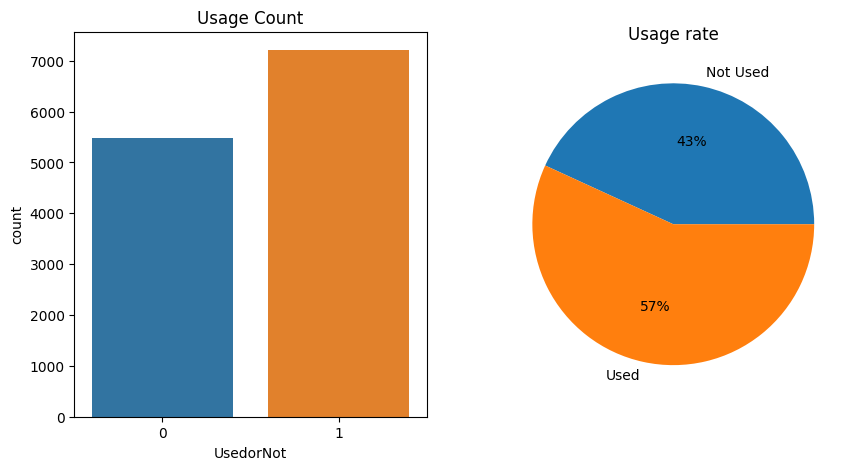

In [ ]:
used= ivcr['UsedorNot'].sum()
not_used = 12684 - used
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.countplot(x='UsedorNot', data = ivcr)
plt.title('Usage Count')
plt.subplot(1,2,2)
plt.pie([not_used, used],labels=['Not Used','Used'],autopct='%1.0f%%')
plt.title('Usage rate')
plt.show()

Sunny    10069
Snowy     1405
Rainy     1210
Name: weather, dtype: int64


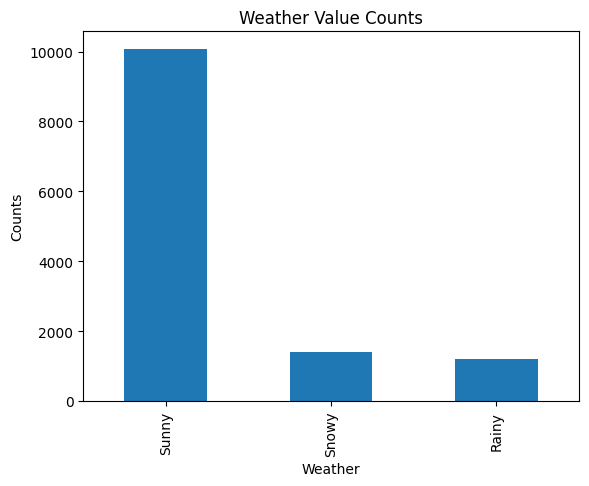

In [ ]:
print(ivcr.weather.value_counts())
wea_count = ivcr.weather.value_counts()
wea_count.plot(kind='bar')
plt.xlabel('Weather')
plt.ylabel('Counts')
plt.title('Weather Value Counts')
plt.show()

$100000 or More     1736
$87500 - $99999      895
$75000 - $87499      857
$62500 - $74999      846
$50000 - $62499     1659
$37500 - $49999     1805
$25000 - $37499     2013
$12500 - $24999     1831
Less than $12500    1042
Name: income, dtype: int64


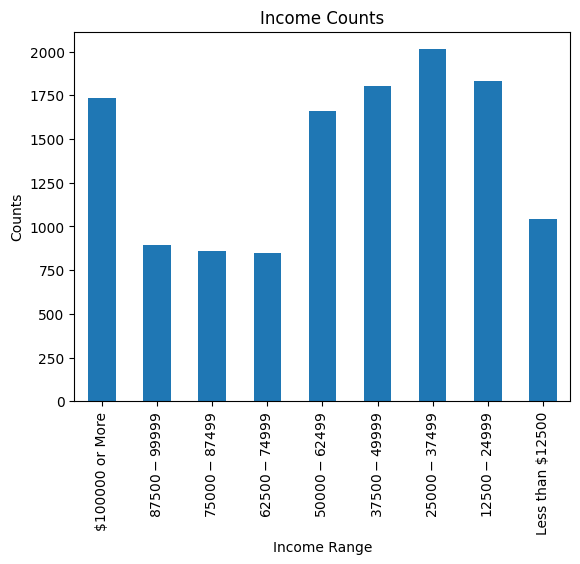

In [ ]:
income_order = ['$100000 or More', '$87500 - $99999', '$75000 - $87499', '$62500 - $74999', '$50000 - $62499', '$37500 - $49999', '$25000 - $37499', '$12500 - $24999', 'Less than $12500']
ivcr['income'] = pd.Categorical(ivcr['income'], categories=income_order, ordered=True)
Ordered_income = ivcr.income.value_counts().sort_index()
print(Ordered_income)
Ordered_income.plot(kind='bar')
plt.xlabel('Income Range')
plt.ylabel('Counts')
plt.title('Income Counts')
plt.show()

Female    6511
Male      6173
Name: gender, dtype: int64


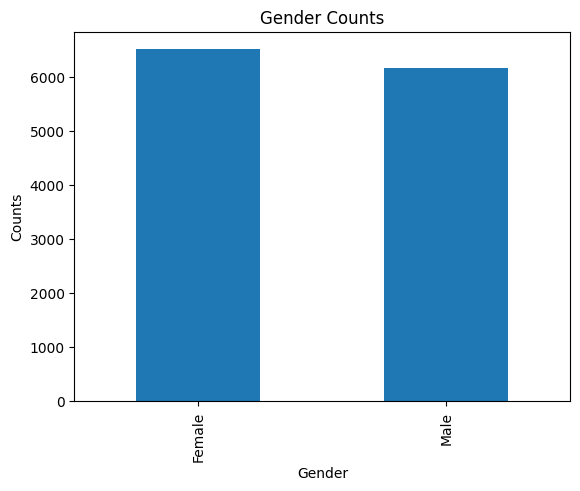

In [ ]:
gender_c = ivcr.gender.value_counts()
print(ivcr.gender.value_counts())
gender_c.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Counts')
plt.title('Gender Counts')
plt.show()

UsedorNot   Not  Used
weather              
Rainy       650   560
Snowy       744   661
Sunny      4080  5989


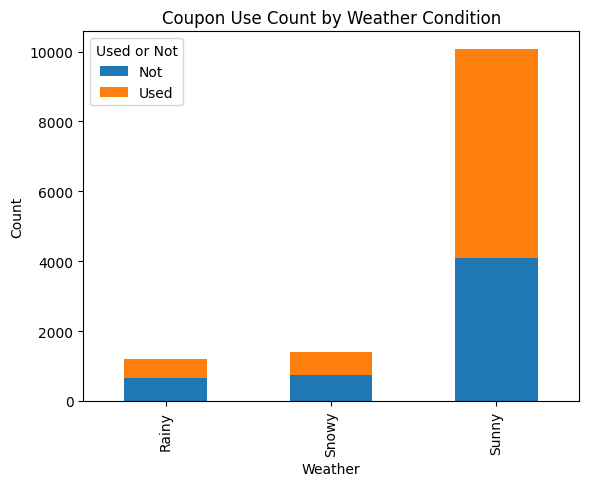

In [ ]:
# Weather - Coupon Usage
ivcr['UsedorNot'] = ivcr['UsedorNot'].replace({0: 'Not', 1: 'Used'})
grouped = ivcr.groupby(['weather', 'UsedorNot']).size().reset_index(name='counts')
pivot = grouped.pivot(index='weather', columns='UsedorNot', values='counts')
print(pivot)
pivot.plot(kind='bar', stacked=True)
plt.xlabel('Weather')
plt.ylabel('Count')
plt.title('Coupon Use Count by Weather Condition')
plt.legend(title='Used or Not')
plt.show()

UsedorNot         Not  Used
income                     
$100000 or More   732  1004
$87500 - $99999   419   476
$75000 - $87499   443   414
$62500 - $74999   400   446
$50000 - $62499   671   988
$37500 - $49999   787  1018
$25000 - $37499   819  1194
$12500 - $24999   779  1052
Less than $12500  424   618


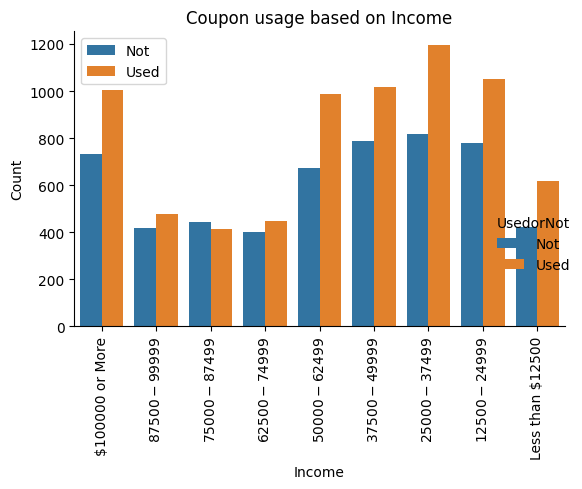

In [ ]:
income_coupon_counts = ivcr.groupby(["income", "UsedorNot"]).size().reset_index(name='counts')
pivot_income = income_coupon_counts.pivot(index='income', columns='UsedorNot', values='counts')
print(pivot_income)
sns.catplot(x='income', y='counts', hue='UsedorNot', kind='bar', data=income_coupon_counts,)
plt.title("Coupon usage based on Income")
plt.xlabel("Income")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.legend(loc='upper left')
plt.show()

UsedorNot   Not  Used
gender               
Female     2948  3563
Male       2526  3647


<Axes: xlabel='gender'>

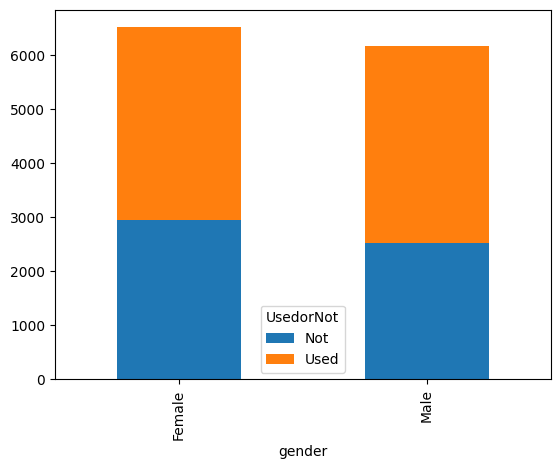

In [ ]:
grouped_gender = ivcr.groupby(['gender', 'UsedorNot']).size().reset_index(name='counts')
pivot_gender = grouped_gender.pivot(index='gender', columns='UsedorNot', values='counts')
print(pivot_gender)
pivot_gender.plot(kind='bar', stacked=True)

<Axes: xlabel='temperature', ylabel='Count'>

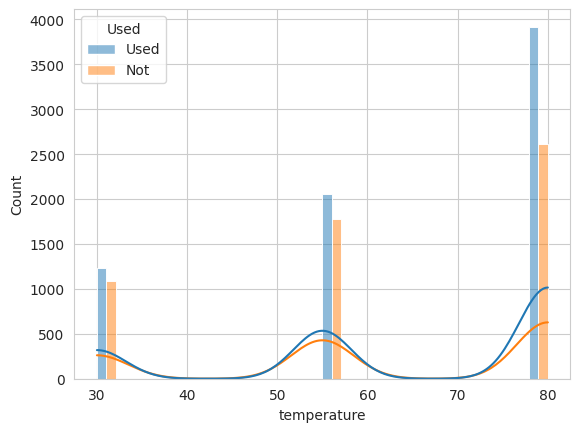

In [ ]:
ivcr['UsedorNot'] = ivcr['UsedorNot'].astype('object')
ivcr['UsedorNot'] = ivcr['UsedorNot'].replace({1: 'Yes', 0: 'No'})
ivcr = ivcr.rename(columns={'UsedorNot': 'Used'})
sns.histplot(data=ivcr, x='temperature', hue='Used', kde=True, multiple='dodge')

<Axes: xlabel='weather', ylabel='Count'>

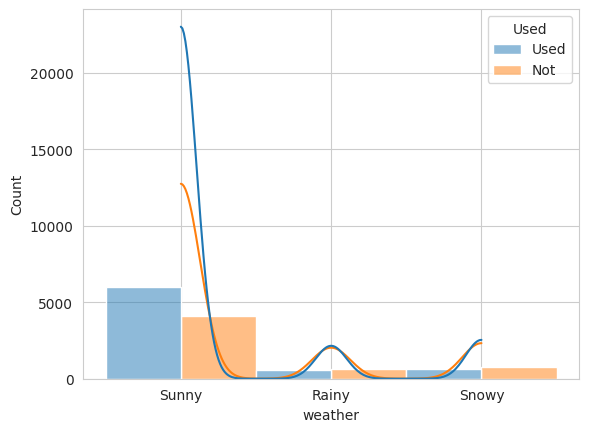

In [ ]:
sns.histplot(data=ivcr, x='weather', hue='Used', kde=True, multiple='dodge')

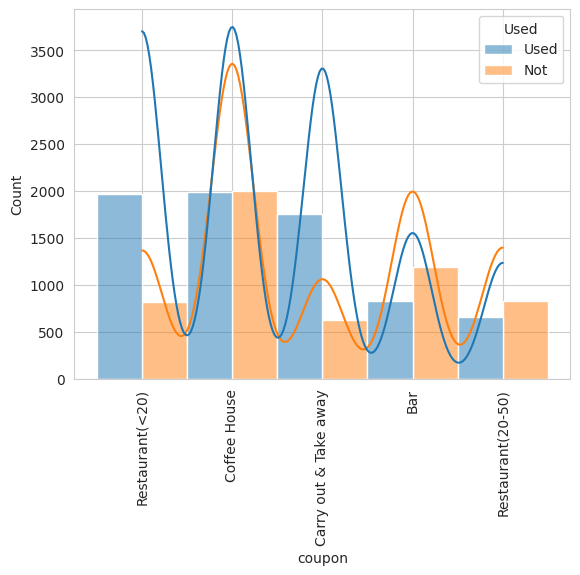

In [ ]:
sns.histplot(data=ivcr, x='coupon', hue='Used', kde=True, multiple='dodge')
plt.xticks(rotation=90)
plt.show()

In [ ]:
ivcr.rename(columns={'UsedorNot': 'Y'}, inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
le = LabelEncoder()
for col in ivcr.columns:
    if ivcr[col].dtype == 'object':
        ivcr[col] = le.fit_transform(ivcr[col])

# Splitting the data
X = ivcr.drop('Y', axis=1)
y = ivcr['Y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


((10147, 24), (2537, 24), (10147,), (2537,))

Adaboost

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

class DecisionStump:
    """
    A simple decision stump used as a weak learner in AdaBoost.
    """
    def __init__(self):
        self.polarity = 1
        self.feature_index = None
        self.threshold = None
        self.alpha = None

    def predict(self, X):
        n_samples = X.shape[0]
        X_column = X[:, self.feature_index]
        predictions = np.ones(n_samples)
        if self.polarity == 1:
            predictions[X_column < self.threshold] = -1
        else:
            predictions[X_column > self.threshold] = -1
        return predictions

class AdaBoost:
    """
    Classifier.
    """
    def __init__(self, n_learners=5):
        self.n_learners = n_learners
        self.learners = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        w = np.full(n_samples, (1 / n_samples))

        y_modified = np.where(y == 0, -1, 1)

        for _ in range(self.n_learners):
            learner = DecisionStump()
            min_error = float('inf')

            for feature_i in range(n_features):
                X_column = X[:, feature_i]
                thresholds = np.unique(X_column)

                for threshold in thresholds:
                    p = 1
                    predictions = np.ones(n_samples)
                    predictions[X_column < threshold] = -1

                    misclassified = w[y_modified != predictions]
                    error = sum(misclassified)

                    if error > 0.5:
                        error = 1 - error
                        p = -1

                    if error < min_error:
                        learner.polarity = p
                        learner.threshold = threshold
                        learner.feature_index = feature_i
                        min_error = error

            EPS = 1e-10
            learner.alpha = 0.5 * np.log((1.0 - min_error + EPS) / (min_error + EPS))
            predictions = learner.predict(X)

            w *= np.exp(-learner.alpha * y_modified * predictions)
            w /= np.sum(w)

            self.learners.append(learner)

    def predict(self, X):
        learner_preds = np.array([learner.alpha * learner.predict(X) for learner in self.learners])
        y_pred = np.sum(learner_preds, axis=0)
        y_pred = np.sign(y_pred)
        return np.where(y_pred == -1, 0, 1)

# Fit the model
ada_model = AdaBoost(n_learners=10)
ada_model.fit(X_train.values, y_train.values)

# Testing the model
y_pred_train = ada_model.predict(X_train.values)
y_pred_test = ada_model.predict(X_test.values)

# Calculation
test_accuracy = accuracy_score(y_test.values, y_pred_test)
print("Accuracy:", test_accuracy)
conf_matrix_test = confusion_matrix(y_test.values, y_pred_test)
print("Confusion Matrix:\n", conf_matrix_test)
class_report_test = classification_report(y_test.values, y_pred_test)
print("Classification Report:\n", class_report_test)



Accuracy: 0.5825778478517935
Confusion Matrix:
 [[ 161  967]
 [  92 1317]]
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.14      0.23      1128
           1       0.58      0.93      0.71      1409

    accuracy                           0.58      2537
   macro avg       0.61      0.54      0.47      2537
weighted avg       0.60      0.58      0.50      2537



Decision Tree

In [ ]:
# Define a class for a Decision Tree Node
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

# Define a class for the Decision Tree
class DecisionTree:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth

    def fit(self, X, y, depth=0):
        n_samples, n_features = X.shape
        unique_classes, class_counts = np.unique(y, return_counts=True)

        if len(unique_classes) == 1:
            return Node(value=unique_classes[0])

        if depth >= self.max_depth:
            return Node(value=np.argmax(class_counts))

        best_gini = 1
        best_split = None

        for feature_index in range(n_features):
            thresholds = np.unique(X[:, feature_index])
            for threshold in thresholds:
                left_indices = X[:, feature_index] < threshold
                right_indices = X[:, feature_index] >= threshold

                left_gini = self.calculate_gini(y[left_indices])
                right_gini = self.calculate_gini(y[right_indices])

                weighted_gini = (left_gini * len(left_indices) + right_gini * len(right_indices)) / n_samples

                if weighted_gini < best_gini:
                    best_gini = weighted_gini
                    best_split = (feature_index, threshold, left_indices, right_indices)

        if best_gini == 1:
            return Node(value=np.argmax(class_counts))

        left = self.fit(X[best_split[2]], y[best_split[2]], depth + 1)
        right = self.fit(X[best_split[3]], y[best_split[3]], depth + 1)
        return Node(feature=best_split[0], threshold=best_split[1], left=left, right=right)

    def calculate_gini(self, y):
        _, counts = np.unique(y, return_counts=True)
        probabilities = counts / len(y)
        gini = 1 - np.sum(probabilities ** 2)
        return gini

    def predict(self, X):
        return [self._predict_tree(self.root, x) for x in X]

    def _predict_tree(self, node, x):
        if node.value is not None:
            return node.value
        if x[node.feature] < node.threshold:
            return self._predict_tree(node.left, x)
        else:
            return self._predict_tree(node.right, x)

# Fit the model
tree = DecisionTree(max_depth=5)
tree.root = tree.fit(X_train.values, y_train.values)

# Testing the model
y_pred = tree.predict(X_test.values)

# Calculation
accuracy = accuracy_score(y_test.values, y_pred)
print("Accuracy:", accuracy)
conf_matrix = confusion_matrix(y_test.values, y_pred)
print("Confusion Matrix:\n", conf_matrix)
class_report = classification_report(y_test.values, y_pred)
print("Classification Report:\n", class_report)

Accuracy: 0.6137169885691762
Confusion Matrix:
 [[ 230  898]
 [  82 1327]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.20      0.32      1128
           1       0.60      0.94      0.73      1409

    accuracy                           0.61      2537
   macro avg       0.67      0.57      0.52      2537
weighted avg       0.66      0.61      0.55      2537



Knn

In [ ]:
from scipy.spatial import cKDTree

class KNNClassifierOptimized:
    def __init__(self, k=5):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        self.kd_tree = cKDTree(X)

    def predict(self, X):
        distances, indices = self.kd_tree.query(X, k=self.k)
        y_pred = [self._predict(indices[i]) for i in range(len(X))]
        return np.array(y_pred)

    def _predict(self, neighbors_indices):
        k_nearest_labels = [self.y_train[i] for i in neighbors_indices]
        most_common = np.bincount(k_nearest_labels).argmax()
        return most_common

# Fit the model
knn_optimized = KNNClassifierOptimized(k=5)
knn_optimized.fit(X_train.values, y_train.values)

# Testing the model
y_pred_optimized = knn_optimized.predict(X_test.values)

# Calculation
accuracy_optimized = accuracy_score(y_test.values, y_pred_optimized)
print("Accuracy (Optimized):", accuracy_optimized)
conf_matrix_optimized = confusion_matrix(y_test.values, y_pred_optimized)
print("Confusion Matrix (Optimized):\n", conf_matrix_optimized)
class_report_optimized = classification_report(y_test.values, y_pred_optimized)
print("Classification Report (Optimized):\n", class_report_optimized)

Accuracy (Optimized): 0.609775325187229
Confusion Matrix (Optimized):
 [[585 543]
 [447 962]]
Classification Report (Optimized):
               precision    recall  f1-score   support

           0       0.57      0.52      0.54      1128
           1       0.64      0.68      0.66      1409

    accuracy                           0.61      2537
   macro avg       0.60      0.60      0.60      2537
weighted avg       0.61      0.61      0.61      2537



In [ ]:
# Reshape
X_train = np.array(X_train)
y_train = np.array(y_train).reshape(-1, 1)

In [ ]:
class NeuralNet():
    '''
    A two layer neural network
    '''

    def __init__(self, layers=[13,8,1], learning_rate=0.001, iterations=100, activation='relu', optimizer='gd'):
        self.params = {}
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.loss = []
        self.sample_size = None
        self.layers = layers
        self.activation = activation
        self.optimizer = optimizer
        self.X = None
        self.y = None

    def tanh(self, Z):
        return np.tanh(Z)

    def dTanh(self, Z):
        return 1.0 - np.tanh(Z)**2

    def init_weights(self):
        '''
        Initialize the weights from a random normal distribution
        '''
        np.random.seed(1) # Seed the random number generator
        self.params["W1"] = np.random.randn(self.layers[0], self.layers[1])
        self.params['b1']  =np.random.randn(self.layers[1],)
        self.params['W2'] = np.random.randn(self.layers[1],self.layers[2])
        self.params['b2'] = np.random.randn(self.layers[2],)

    def relu(self,Z):
        '''
        The ReLu activation function is to performs a threshold
        operation to each input element where values less
        than zero are set to zero.
        '''
        return np.maximum(0,Z)

    def dRelu(self, x):
        x[x<=0] = 0
        x[x>0] = 1
        return x

    def eta(self, x):
      ETA = 0.0000000001
      return np.maximum(x, ETA)


    def sigmoid(self,Z):
        '''
        The sigmoid function takes in real numbers in any range and
        squashes it to a real-valued output between 0 and 1.
        '''
        return 1/(1+np.exp(-Z))

    def entropy_loss(self, y, yhat):
        nsample = len(y)
        yhat_inv = 1.0 - yhat
        y_inv = 1.0 - y
        yhat = self.eta(yhat)  # clips value to avoid NaNs in log
        yhat_inv = self.eta(yhat_inv)
        # Convert to NumPy arrays if they are not already
        y = np.array(y)
        yhat = np.array(yhat)
        loss = -1/nsample * (np.sum(np.multiply(np.log(yhat), y) + np.multiply((y_inv), np.log(yhat_inv))))
        return loss
P

    def forward_propagation(self):
        '''
        Performs the forward propagation
        '''

        Z1 = self.X.dot(self.params['W1']) + self.params['b1']
        A1 = self.tanh(Z1) if self.activation == 'tanh' else self.relu(Z1)  # Use selected activation function
        Z2 = A1.dot(self.params['W2']) + self.params['b2']
        yhat = self.sigmoid(Z2)
        loss = self.entropy_loss(self.y, yhat)
        self.params['Z1'], self.params['A1'], self.params['Z2'] = Z1, A1, Z2
        return yhat, loss


    def back_propagation(self, yhat):
        '''
        Computes the derivatives and updates weights and bias accordingly.
        '''
        y_inv = 1 - self.y
        yhat_inv = 1 - yhat

        dl_wrt_yhat = np.divide(y_inv, self.eta(yhat_inv)) - np.divide(self.y, self.eta(yhat))
        dl_wrt_sig = yhat * (yhat_inv)
        dl_wrt_z2 = dl_wrt_yhat * dl_wrt_sig

    # Compute the gradient with respect to A1
        dl_wrt_A1 = dl_wrt_z2.dot(self.params['W2'].T)

    # Use the correct derivative based on the activation function
        if self.activation == 'tanh':
          dl_wrt_z1 = dl_wrt_A1 * self.dTanh(self.params['Z1'])
        else:  # default to ReLU if not 'tanh'
          dl_wrt_z1 = dl_wrt_A1 * self.dRelu(self.params['Z1'])

        dl_wrt_w1 = self.X.T.dot(dl_wrt_z1)
        dl_wrt_b1 = np.sum(dl_wrt_z1, axis=0, keepdims=True)

        dl_wrt_w2 = self.params['A1'].T.dot(dl_wrt_z2)
        dl_wrt_b2 = np.sum(dl_wrt_z2, axis=0, keepdims=True)

    # Update the weights and bias
        self.params['W1'] = self.params['W1'] - self.learning_rate * dl_wrt_w1
        self.params['W2'] = self.params['W2'] - self.learning_rate * dl_wrt_w2
        self.params['b1'] = self.params['b1'] - self.learning_rate * dl_wrt_b1
        self.params['b2'] = self.params['b2'] - self.learning_rate * dl_wrt_b2

    def fit(self, X, y):
        '''
        Trains the neural network using the specified data and labels
        '''
        self.X = X
        self.y = y
        self.init_weights() #initialize weights and bias


        for i in range(self.iterations):
            if self.optimizer == 'sgd':
                # Implement SGD logic here
                for j in range(X.shape[0]):
                    self.X, self.y = X[j:j+1], y[j:j+1]
                    yhat, loss = self.forward_propagation()
                    self.back_propagation(yhat)
                    self.loss.append(loss)
            else:  # Default to GD
            # Implement GD logic here
                yhat, loss = self.forward_propagation()
                self.back_propagation(yhat)
                self.loss.append(loss)

    def predict(self, X):
        '''
        Predicts on a test data
        '''
        Z1 = X.dot(self.params['W1']) + self.params['b1']
        A1 = self.relu(Z1)
        Z2 = A1.dot(self.params['W2']) + self.params['b2']
        pred = self.sigmoid(Z2)
        return np.round(pred)

    def acc(self, y, yhat):
        '''
        Calculates the accuracy between the predicted values and actual
        '''
        # Ensure y and yhat are both NumPy arrays
        y = np.array(y).flatten()  # Flatten to 1D array if not already
        yhat = np.array(yhat).flatten()

        # Calculate accuracy
        correct_predictions = np.sum(y == yhat)
        accuracy = correct_predictions / len(y) * 100
        return int(accuracy)



    def plot_loss(self):
        '''
        Plots the loss curve
        '''
        plt.plot(self.loss)
        plt.xlabel("Iteration")
        plt.ylabel("logloss")
        plt.title("Loss curve for training")
        plt.show()

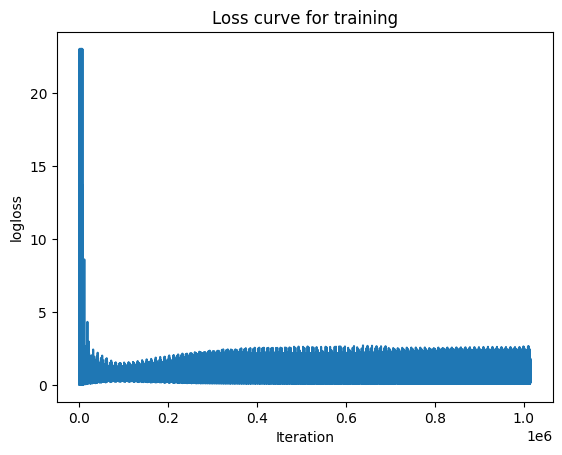

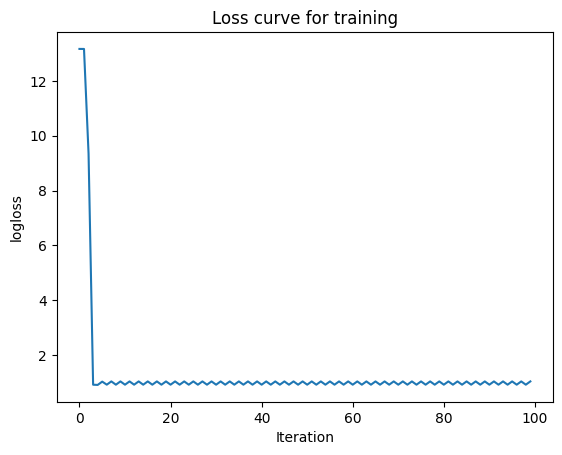

Optimizer: sgd

Training Accuracy: 62%
Training Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.56      0.56      4346
           1       0.67      0.67      0.67      5801

    accuracy                           0.62     10147
   macro avg       0.61      0.61      0.61     10147
weighted avg       0.62      0.62      0.62     10147

Test Accuracy: 60%
Test Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.53      0.55      1128
           1       0.64      0.67      0.65      1409

    accuracy                           0.61      2537
   macro avg       0.60      0.60      0.60      2537
weighted avg       0.61      0.61      0.61      2537

--------------------------------------------------------------------------------
Optimizer: gd

Training Accuracy: 42%
Training Classification Report:
               precision    recall  f1-score   support

           0       

In [ ]:
from sklearn.metrics import classification_report

optimizers = ['sgd', 'gd']
performances = {}

input_dim = X_train.shape[1]
for optimizer in optimizers:
    # Create the model with the specified optimizer
    model = NeuralNet(layers=[input_dim, 8, 1], learning_rate=0.001, iterations=100, activation='relu', optimizer=optimizer)
    model.fit(X_train, y_train)

    # Evaluate the model on the training set
    train_predictions = model.predict(X_train)
    train_accuracy = model.acc(y_train, train_predictions)
    train_report = classification_report(y_train, train_predictions)

    # Evaluate the model on the test set
    test_predictions = model.predict(X_test)
    test_accuracy = model.acc(y_test, test_predictions)
    test_report = classification_report(y_test, test_predictions)

    # Store the performance metrics and reports
    performances[optimizer] = {
        'Training Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy,
        'Training Report': train_report,
        'Test Report': test_report
    }

    # Plot the loss curve
    model.plot_loss()

# Display the performances and reports
for optimizer, metrics in performances.items():
    print(f"Optimizer: {optimizer}\n")
    print(f"Training Accuracy: {metrics['Training Accuracy']}%")
    print("Training Classification Report:\n", metrics['Training Report'])
    print(f"Test Accuracy: {metrics['Test Accuracy']}%")
    print("Test Classification Report:\n", metrics['Test Report'])
    print("-" * 80)
